# SOK-1303 Mikroøkonomi

## Notater Konsumentteori - kapittel 2.1 -2.4 

### Substitusjons- og inntektseffekten av en prisendring
En prisendring har to effekter: (i) substitusjonseffekten som vanligvis gjør at konsumenten bytter bort fra en vare som er blitt relativt dyrere, (ii) inntektseffekten som følger av en endring i reell kjøpekraft pga en prisendring. Figuren viser dekomponeringen for en økning i prisen på gode B, hvor budsjettlinjen dreier fra $m_1$ til $m_2$.

Endring fra tilpasning i punkt a til punkt b viser substitusjonseffekten, som reduserer etterspørsel etter gode B som er blitt relativt dyrere, og øker etterspørsel etter gode A. Endring fra punkt b til punkt c viser inntektseffekten, hvor etterspørsel etter begge goder faller pga av konsumentens realinntekt har falt. I sum (ac) er etterspørsel etter gode B blitt redusert, mens etterspørselen etter gode A er uendret. For gode B går begge effektene i negativ retning (lavere etterspørsel). For gode A er substitusjonseffekten positiv og  inntektseffekten er negativ retning. Ved Cobb-Douglas-preferanser vil krysspriseffekten være null.

![Bilde](Picture2.png)

### Oppskrift for å tegne og beregne inntekts og substitusjonseffekter

Vi ser på en husholdning som har en Cobb-Douglas nyttefunksjon

$U(A,B)=A^{0.25}B^{0.4}$.

Vi antar at  $p_A=p_B=2, I=100$ i utgangspunktet, så økes prisen på gode B til 10.   

  

##### Steg 1
Før prisendringen: beregn optimal verdier på $A, B$ og finn nyttenivået som konsumenten oppnår. Tegn tilpasningen i en figur (budsjettbetingelse, oppnådd nytte og tilpasningspunkt).

##### Steg 2
Prisen på gode B økes. Finn de nye verdiene på $A, B$ og finn det nye nyttenivået. Tegn den nye budsjettlinjen, oppnådd nytte og tilpasningen inn i figuren. Beregn den totale endringen i etterspørsel etter gode 1 og 2. 

##### Steg 3
Gitt den nye prisen på gode B finn hvor mye inntekt konsumenten trenger for å oppnå nyttenivået fra Steg 1. Med denne fiktive budsjettlinjen finn konsumentens tilpasning og tegn denne i figuren.

##### Steg 4
Dekomponer den totale endringen fra Steg 2 i en substitusjonseffekt (langs indifferenskurven fra steg 1) og en inntektseffekt (fra indifferenskurven fra steg 1 til indifferenskurven fra steg 2)


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [2]:
# symboler

Acd, Bcd, I, p_A, p_B, = sp.symbols("Acd Bcd I p_A p_B", real=True, positive=True)

# nytte
nytte_cd = Acd**.25*Bcd**.4

# steg 1

Acd_eq = (0.25*I)/(p_A*(0.25+0.4))
Bcd_eq = (0.4*I)/(p_B*(0.4+0.25))



# budsjett A = I/p_A - p_BB/p_B

def budsjett(I, B, p_B, p_A):
    return I/p_A - (p_B*B/p_A)


# oppnådd nytte i likevekt

Vcd = nytte_cd.subs([(Acd, Acd_eq), (Bcd, Bcd_eq)])
Vcd

# LEGG MERKE TIL AT DETTE ER EN FUNKSJON AV I
# DETTE BRUKES I STEG 3

0.648507968593938*I**0.65/(p_A**0.25*p_B**0.4)

In [3]:
# lag funksjon for indifferenskurve
U_a=sp.symbols('U_a', real = True, positive=True)

ind_kcd = sp.solve(nytte_cd-U_a, Acd)[0]
display(ind_kcd)

U_a**4/Bcd**(8/5)

In [4]:
ind_kcd_fn = sp.lambdify((Bcd,U_a), ind_kcd)
ind_kcd_fn

<function _lambdifygenerated(Bcd, U_a)>

In [5]:
# sett inn verdier

Bcd_eq_num = float(Bcd_eq.subs([(I, 100), (p_A, 2), (p_B, 2)]))
Acd_eq_num = float(Acd_eq.subs([(I, 100), (p_A, 2), (p_B, 2)]))
nytte_cd_num = float(Vcd.subs([(I, 100), (p_A, 2), (p_B, 2)]))
display(Acd_eq_num)
display(Bcd_eq_num)
display(nytte_cd_num)

19.23076923076923

30.76923076923077

8.246047263519642

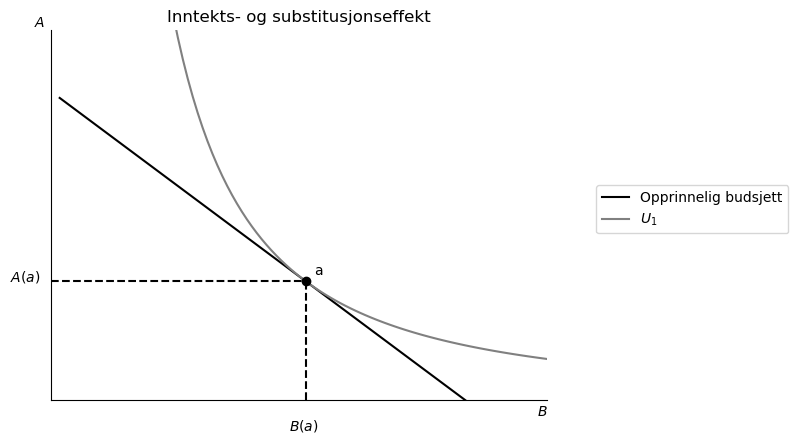

In [6]:
# tegne steg 1

# lage en akse

x=np.linspace(1.01,60, 100)

def create_ax():
                fig, ax = plt.subplots()
                # ax.set_ylabel('$A$', loc='top', rotation=0)
                ax.set_xlabel('$B$', loc='right')
                
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax


fig, ax = create_ax()
ax.set(xlim=(0,60))
ax.set(ylim=(0,60))

# ta bort tall på aksene
ax.set_xticks([], [])
ax.set_yticks([], [])

ax.set_ylabel('$A$', loc='top', rotation=0)


ax.plot(x, budsjett(100, x, 2, 2), color='black', label='Opprinnelig budsjett')
ax.plot(x, ind_kcd_fn(x,nytte_cd_num), color='grey',label='$U_1$')

ax.vlines(Bcd_eq_num, 0, Acd_eq_num, ls='dashed', color='black')
ax.hlines(Acd_eq_num, 0, Bcd_eq_num, ls='dashed', color='black')

ax.annotate('$B(a)$', (Bcd_eq_num-2, -5), annotation_clip=False)
ax.annotate('$A(a)$', (-5, Acd_eq_num), annotation_clip=False)
ax.annotate('a', (Bcd_eq_num+1,Acd_eq_num+1))
ax.plot(Bcd_eq_num, Acd_eq_num , marker='o', color='black')



# tittel
ax.set_title('Inntekts- og substitusjonseffekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

In [7]:
# Steg 2

# beregne nye verdier


Bcd_eq_ny = float(Bcd_eq.subs([(I, 100), (p_B, 10), (p_A, 2)]))
Acd_eq_ny = float(Acd_eq.subs([(I, 100), (p_B, 10), (p_A, 2)]))
nytte_cd_ny = float(Vcd.subs([(I, 100), (p_B, 10), (p_A, 2)]))


display(Bcd_eq_ny)
display(Acd_eq_ny)
display(nytte_cd_ny)

6.153846153846154

19.23076923076923

4.331694482812388

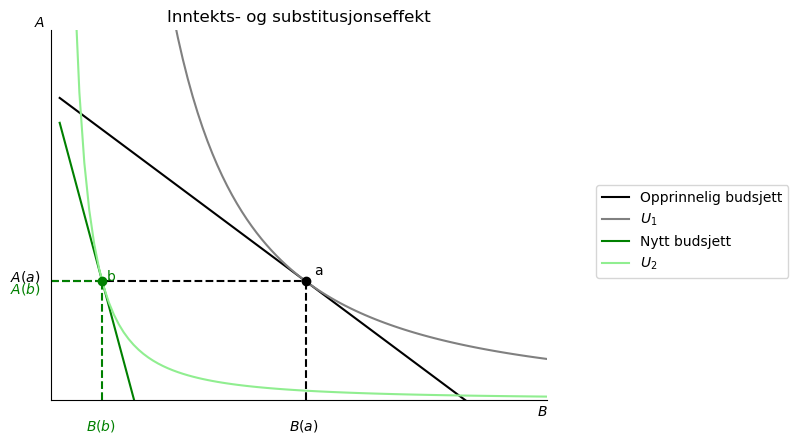

In [8]:
# legg nye verdier på tegningen

ax.plot(x, budsjett(100, x, 10, 2), color='green', label='Nytt budsjett')
ax.plot(x, ind_kcd_fn(x,nytte_cd_ny), color='lightgreen', label='$U_2$')

ax.vlines(Bcd_eq_ny, 0, Acd_eq_ny, ls='dashed', color='green')
ax.hlines(Acd_eq_ny, 0, Bcd_eq_ny, ls='dashed', color='green')

ax.annotate('$B(b)$', (Bcd_eq_ny-2, -5), color='green', annotation_clip=False)
ax.annotate('$A(b)$', (-5, Acd_eq_ny-2), color= 'green', annotation_clip=False)
ax.annotate('b', (Bcd_eq_ny+.5,Acd_eq_ny), color='green')
ax.plot(Bcd_eq_ny, Acd_eq_ny , marker='o', color='green')

ax.legend(bbox_to_anchor=(1.5,0.6))
fig

In [9]:
# steg 3

# beregn fiktiv inntekt

# finn først hvordan oppnådd nytte er avhengig av inntekt gitt nye priser

Vcd_I = Vcd.subs([(p_B, 10), (p_A, 2)])
Vcd_I

0.217098997475926*I**0.65

In [10]:
fikt_cdm = sp.solve(Vcd_I-nytte_cd_num, I)
fikt_cdm


[269.237399578010]

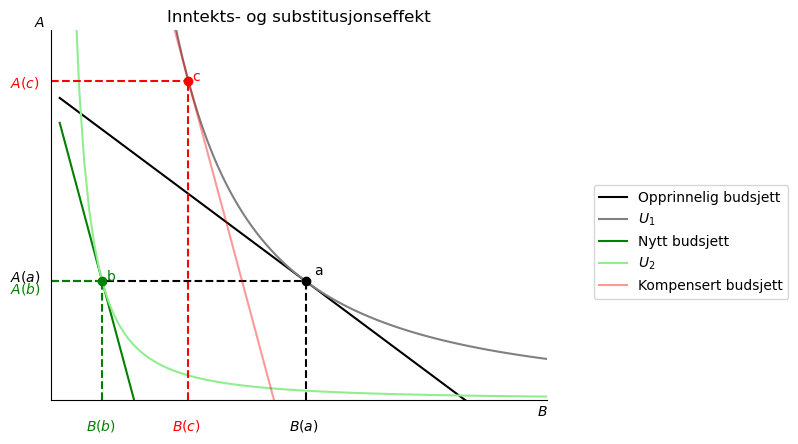

In [11]:
# fiktiv inntekt er 269.24
# med denne inntekten og de nye prisene kan konsumenten få samme nytte til de nye prisene som i utgangspunktet.

# verdier for godene med denne inntekten
Bcd_eq_komp = float(Bcd_eq.subs([(I, 269.24), (p_B, 10), (p_A, 2)]))
Acd_eq_komp = float(Acd_eq.subs([(I, 269.24), (p_B, 10), (p_A, 2)]))

# tegne budsjett med denne inntekten "kompensert budsjett"

ax.plot(x, budsjett(269.24, x, 10, 2), color='red', alpha=.4, label='Kompensert budsjett')

ax.vlines(Bcd_eq_komp, 0, Acd_eq_komp, ls='dashed', color='red')
ax.hlines(Acd_eq_komp, 0, Bcd_eq_komp, ls='dashed', color='red')

ax.annotate('$B(c)$', (Bcd_eq_komp-2, -5), color='red', annotation_clip=False)
ax.annotate('$A(c)$', (-5, Acd_eq_komp-1), color= 'red', annotation_clip=False)
ax.annotate('c', (Bcd_eq_komp+.5,Acd_eq_komp), color='red')
ax.plot(Bcd_eq_komp, Acd_eq_komp , marker='o', color='red')

ax.legend(bbox_to_anchor=(1.5,0.6))
fig

In [12]:
# generell tabell

from IPython.display import Markdown

tblcd=f"""
|    Gode     | Substitusjonseffekt|  Inntektseffekt  |  Total effekt  |
| :----------------------| :------------------| :------------------------| :--------------|
| B | ${np.round(float(Bcd_eq_komp-Bcd_eq_num),2)}$|${np.round(float(Bcd_eq_ny-Bcd_eq_komp),2)}$| ${np.round(float(Bcd_eq_ny-Bcd_eq_num),2)}$     |
| A |${np.round(float(Acd_eq_komp-Acd_eq_num),2)}$ | ${np.round(float(Acd_eq_ny-Acd_eq_komp),2)}$ |  ${np.round(float(Acd_eq_ny-Acd_eq_num),2)}$    |

"""
display(Markdown(tblcd))


|    Gode     | Substitusjonseffekt|  Inntektseffekt  |  Total effekt  |
| :----------------------| :------------------| :------------------------| :--------------|
| B | $-14.2$|$-10.41$| $-24.62$     |
| A |$32.55$ | $-32.55$ |  $0.0$    |

